In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import dump, load



In [2]:
advertising = pd.read_csv("Advertising.csv")
advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


lineer regresyon için bir örnek:
x değerlerinin üçünü de bir noktaya indirgeyelim
x, total harcamalara dönüşsün


In [3]:
total_spending = advertising["TV"] + advertising["radio"] + advertising["newspaper"]
advertising["total_spending"] = total_spending
advertising = advertising[["TV","radio","newspaper","total_spending","sales"]]
advertising

,TV,radio,newspaper,total_spending,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


total spending ile sales scatterplotu çizelim-

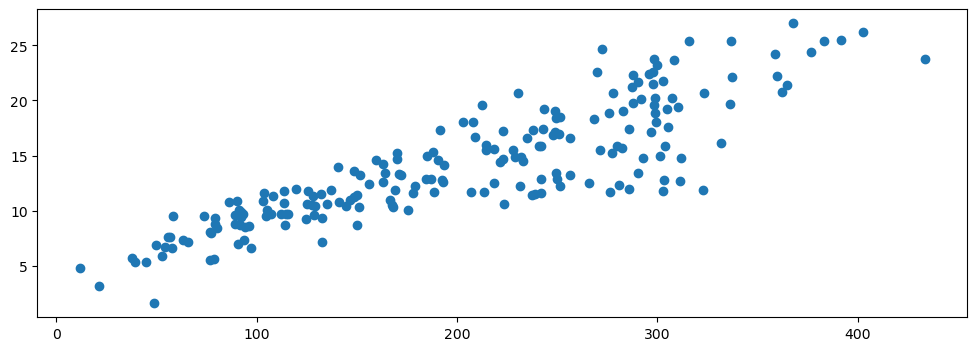

In [4]:
plt.figure(figsize=(12,4))
fig = plt.scatter(advertising["total_spending"],advertising["sales"])

bu noktaların arasına dağılmış en az hataya sahip doğru denklemini çizelim

Text(0, 0.5, 'total sales')

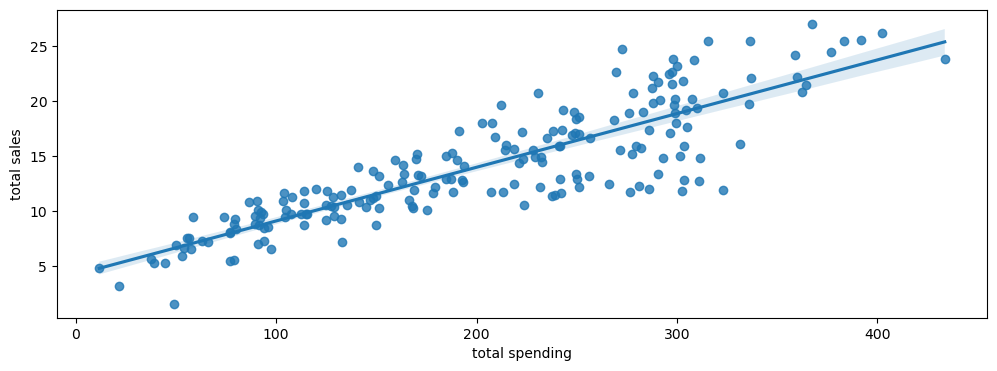

In [5]:
plt.figure(figsize=(12,4))
x = advertising["total_spending"]
y = advertising["sales"]
reg_fig =sns.regplot(data=advertising,x=x,y=y)
reg_fig = plt.rcParams['figure.dpi'] = 400
plt.xlabel("total spending")
plt.ylabel("total sales")

regresyon doğrusunun beta coefficentlarını bulalım

In [6]:
np.polyfit(x=advertising["total_spending"],y = advertising["sales"],deg = 1)

array([0.04868788, 4.24302822])

denklem y = 0.04868788*x + 4.24302822

train test split aşaması ve modelleme:

In [7]:
x = advertising.iloc[:, [0,1,2]]
y = advertising["sales"]

In [8]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [13]:
test_predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [14]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
       ... 
183    26.2
127     8.8
53     21.2
100    11.7
93     22.2
Name: sales, Length: 66, dtype: float64

modelin bu veri seti üzerinde seedine göre performansını değerlendirelim

MEAN ABSOLUTE ERROR

In [15]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.2369188494259318

MEAN SQUARED ERROR

In [16]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

2.348375242713827

ROOT MEAN SQUARED ERROR

In [17]:
RMSE = np.sqrt(MSE)
RMSE

1.532440942651242

---------------------------------------------------------------------------------------------------------------------------

Residual grafiği ile veri setinin regresyona uygunluğu ve derece

Anscombe's Quartet: nümerik hesaplamalarının ilerleyişi birbirine benzer veriler ancak bu verilerin dağılımı farklı olabilir.Buna göre uyum kontrolü yapılır. Bu quartet 4 farklı veri dağılımına sahip dataseti gösterir
 
 
 https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

x1,y1 grafiği:

In [18]:
quartet1 = pd.read_csv('anscombes_quartet1.csv')

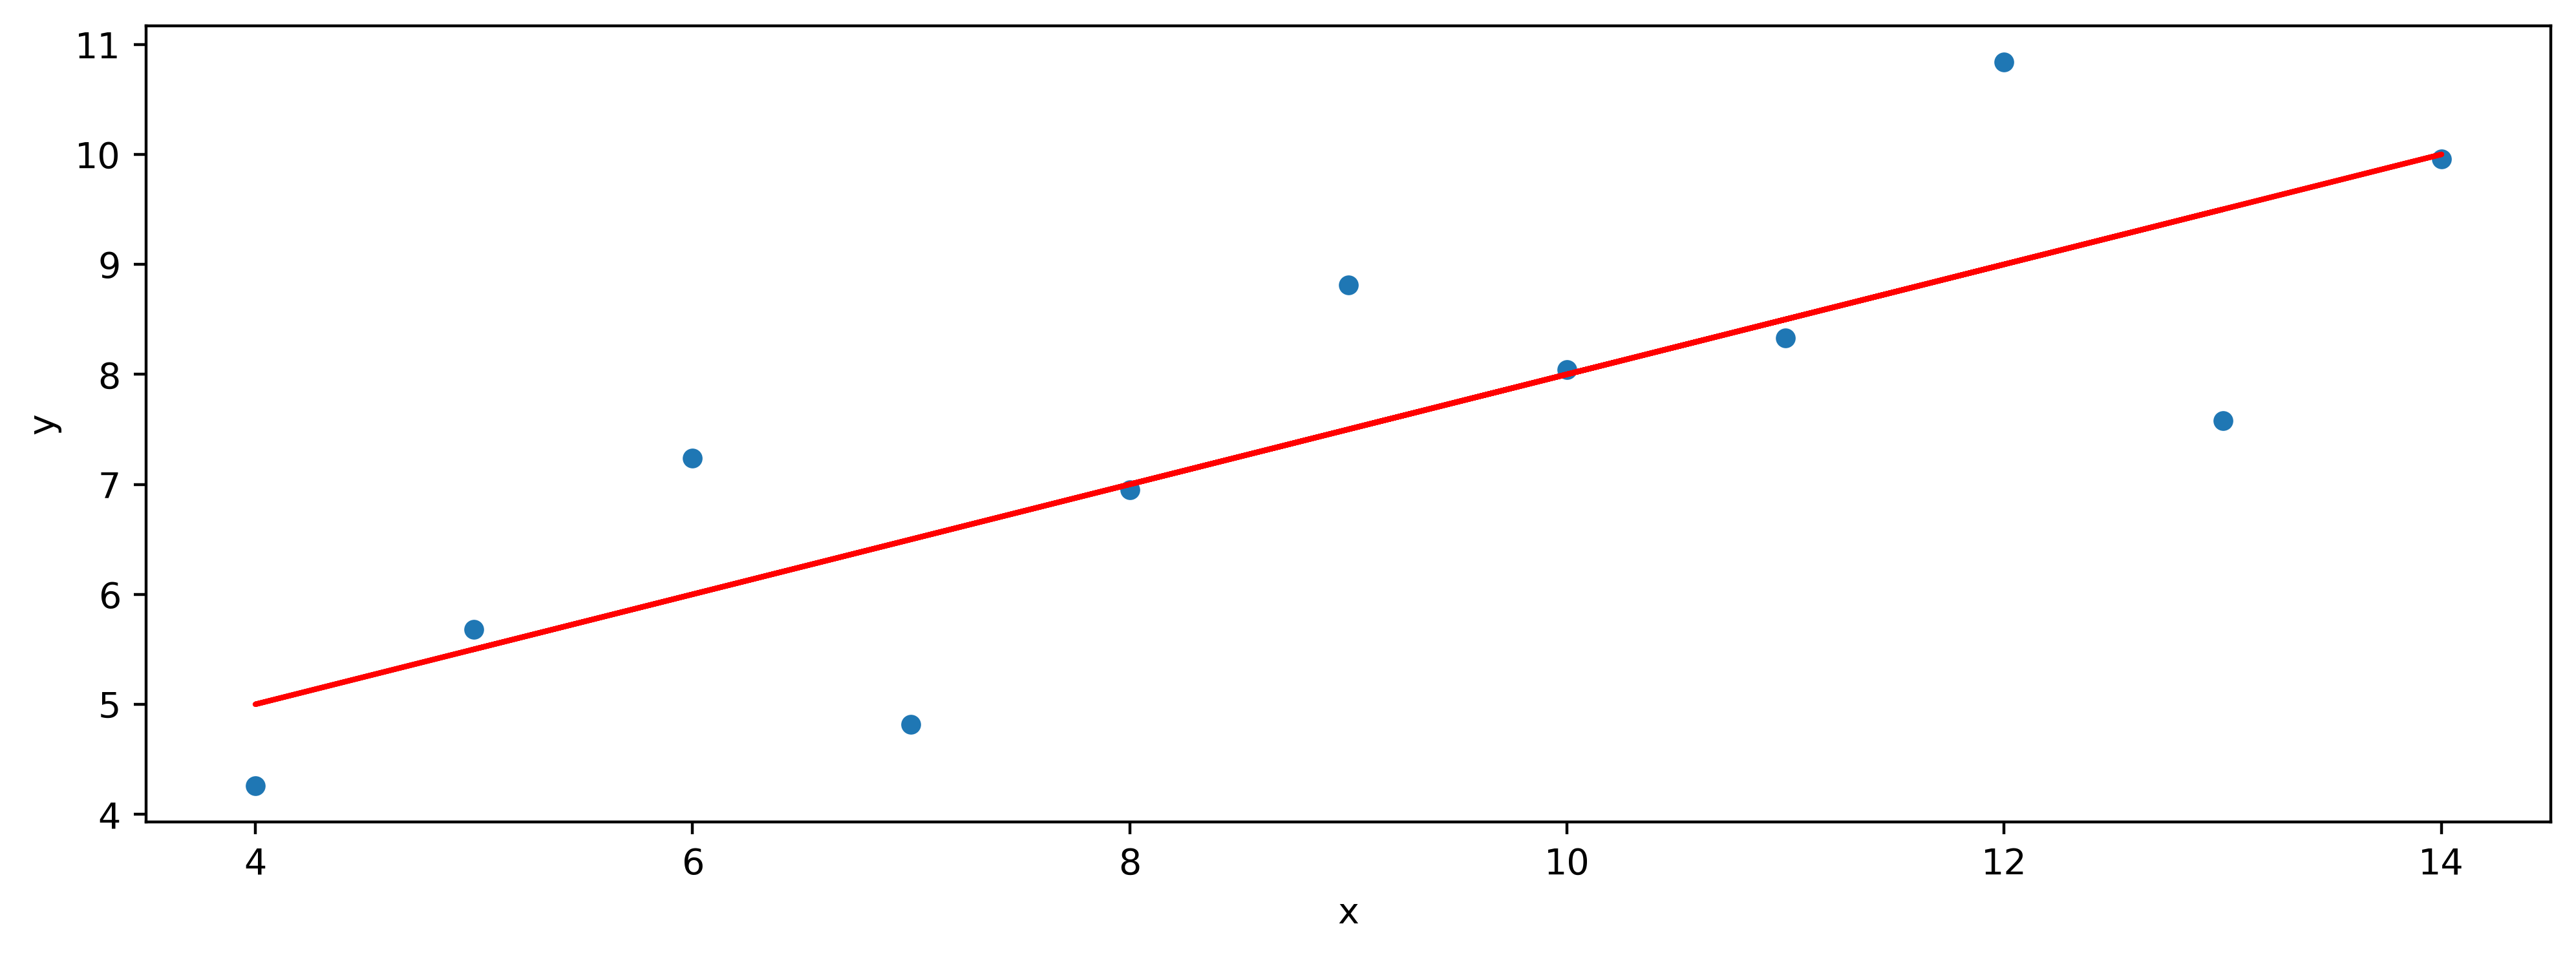

In [19]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet1,x=quartet1["x"],y=quartet1["y"])
np.polyfit(quartet1["x"],quartet1["y"],1)
quartet1["pred_y"] = quartet1["x"] * 0.5 + 3
plt.plot(quartet1["x"],quartet1["pred_y"],'r')

residual hesabı

residual dağılımı rastgele ve belirli bir örüntüde olmadığı için kabul edilebilir bi dağılımdadır

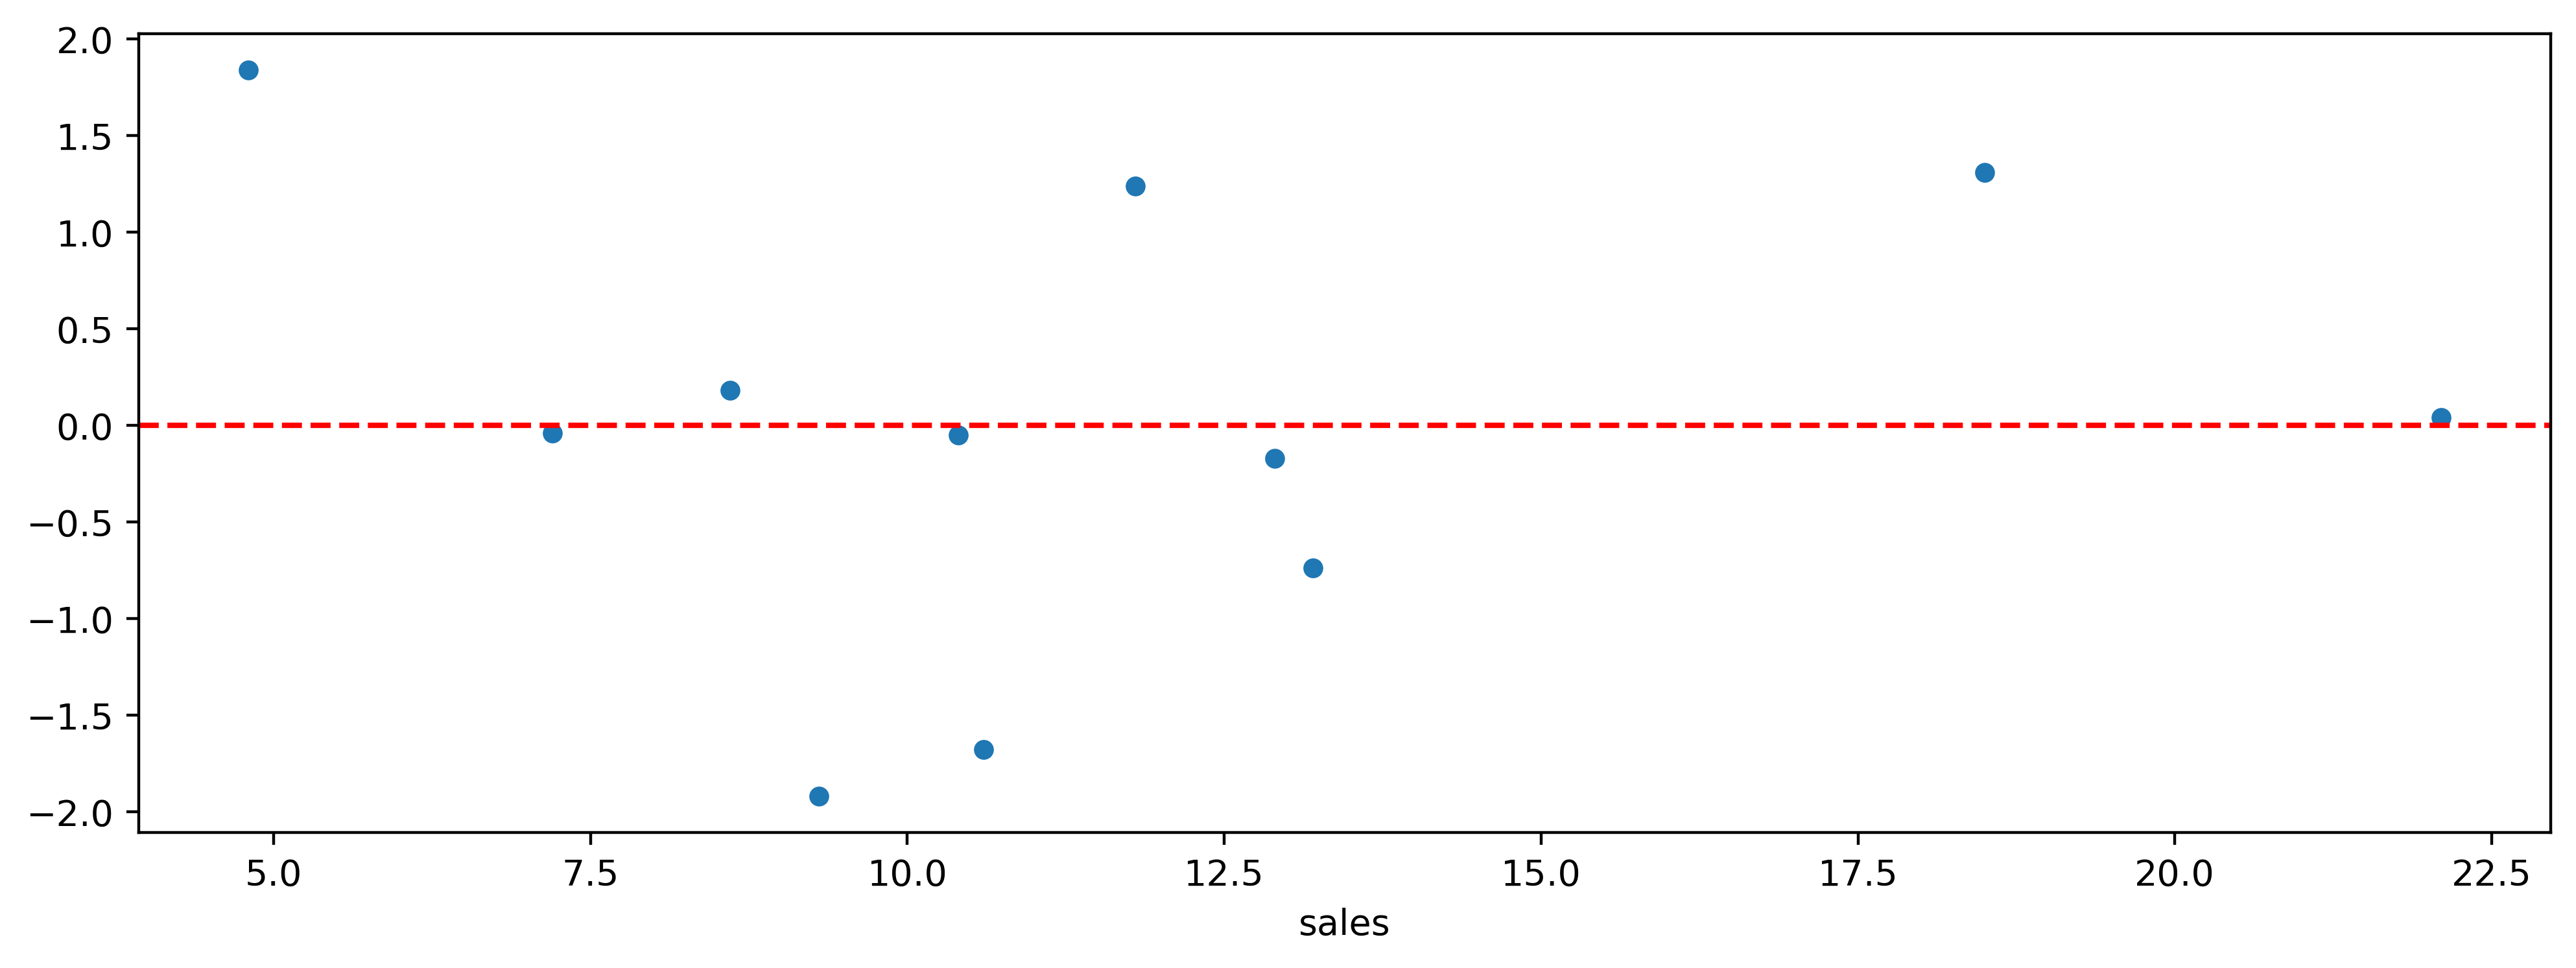

In [20]:
residual = quartet1["y"] - quartet1["pred_y"]
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet1,x=y,y=residual)
plt.axhline(y=0,linestyle="--",color="r")

x2,y2 grafiği

In [21]:
quartet2 = pd.read_csv('anscombes_quartet2.csv')

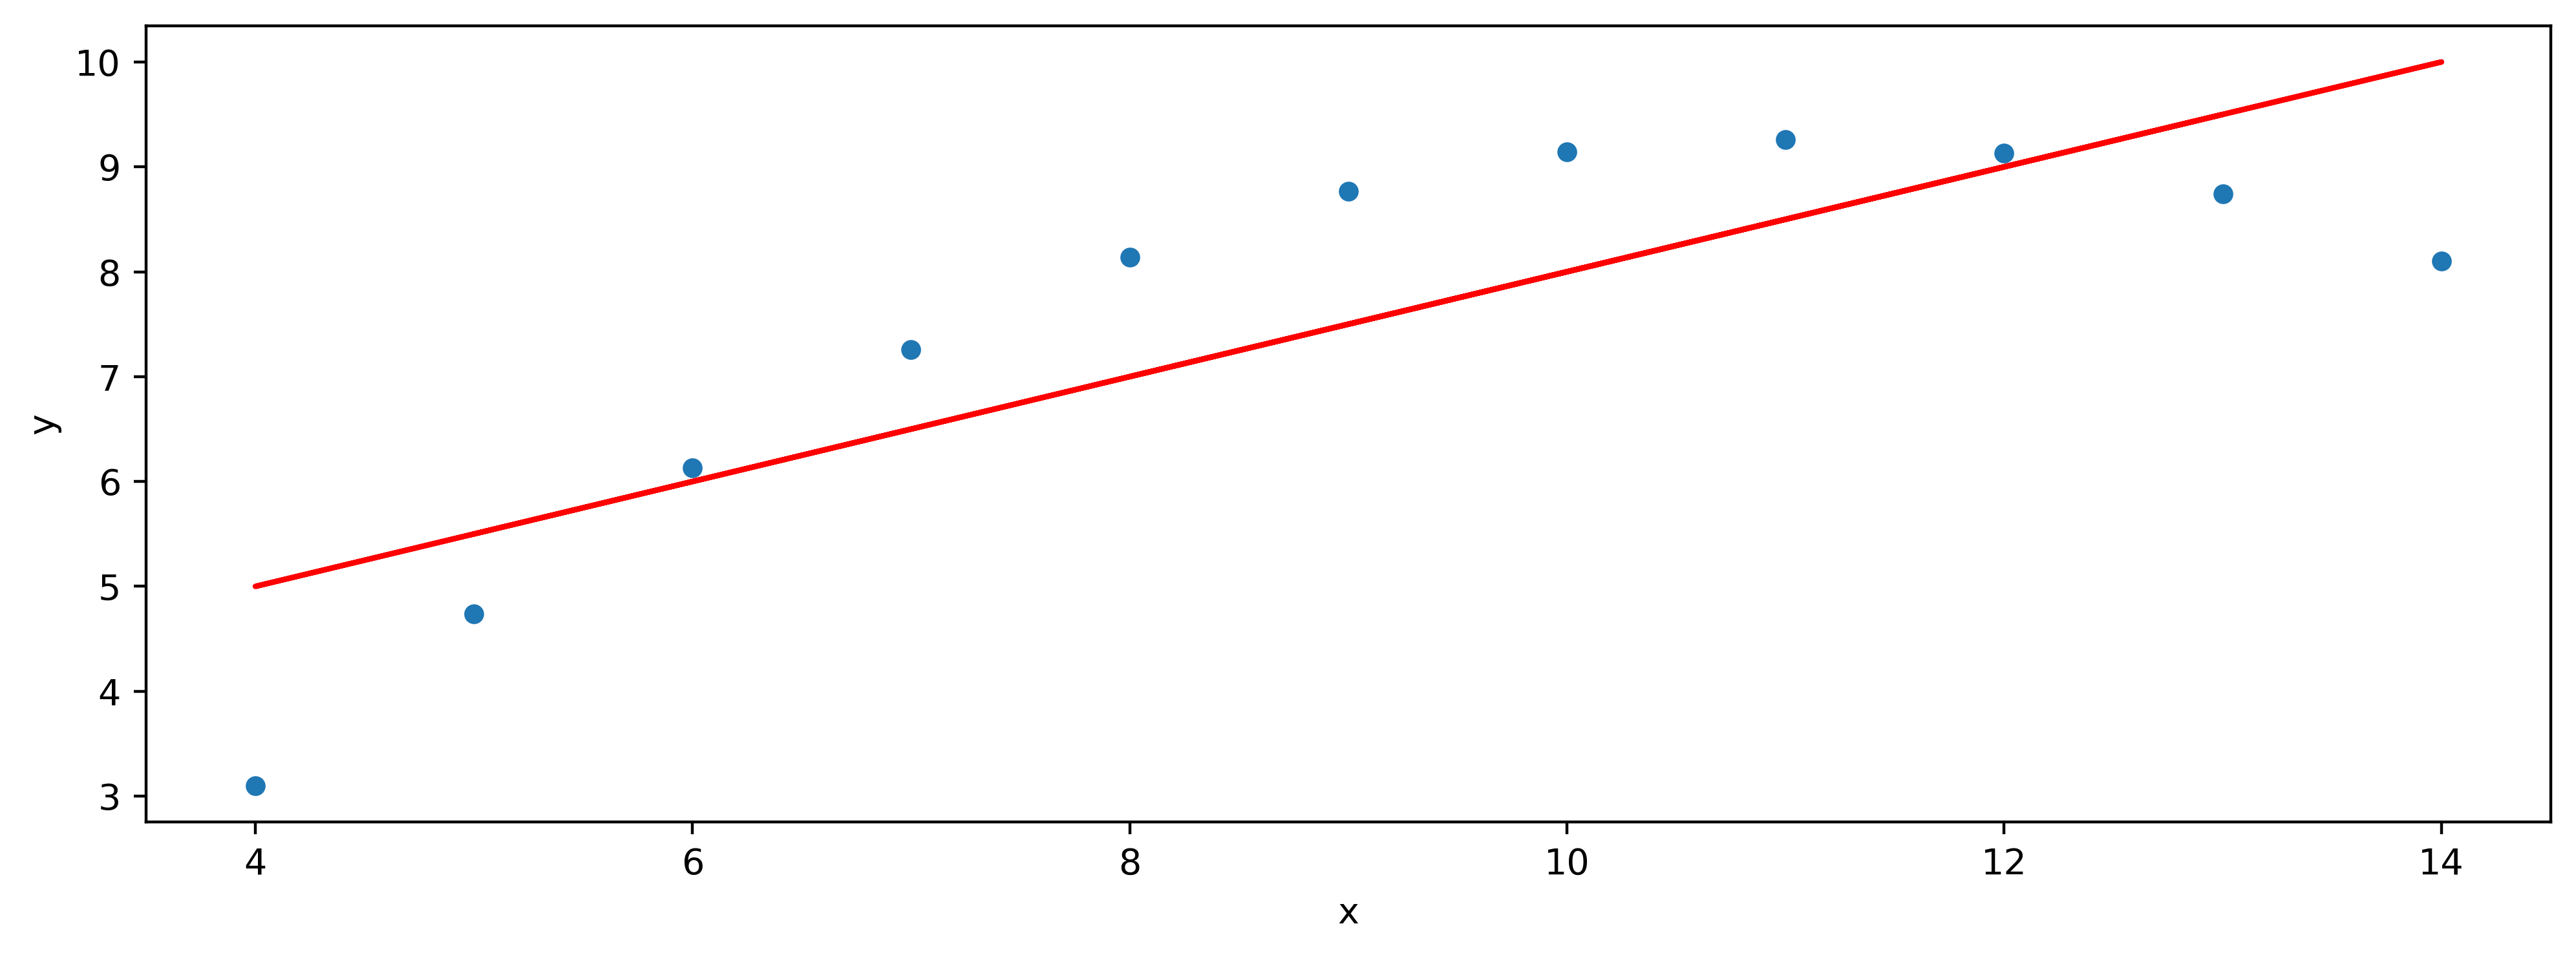

In [22]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet2,x=quartet2["x"],y=quartet2["y"])
np.polyfit(quartet2["x"],quartet2["y"],1)
quartet2["y_pred"] = quartet2["x"]*0.5 + 3
plt.plot(quartet2["x"],quartet2["y_pred"],color="r")

residual hesabı

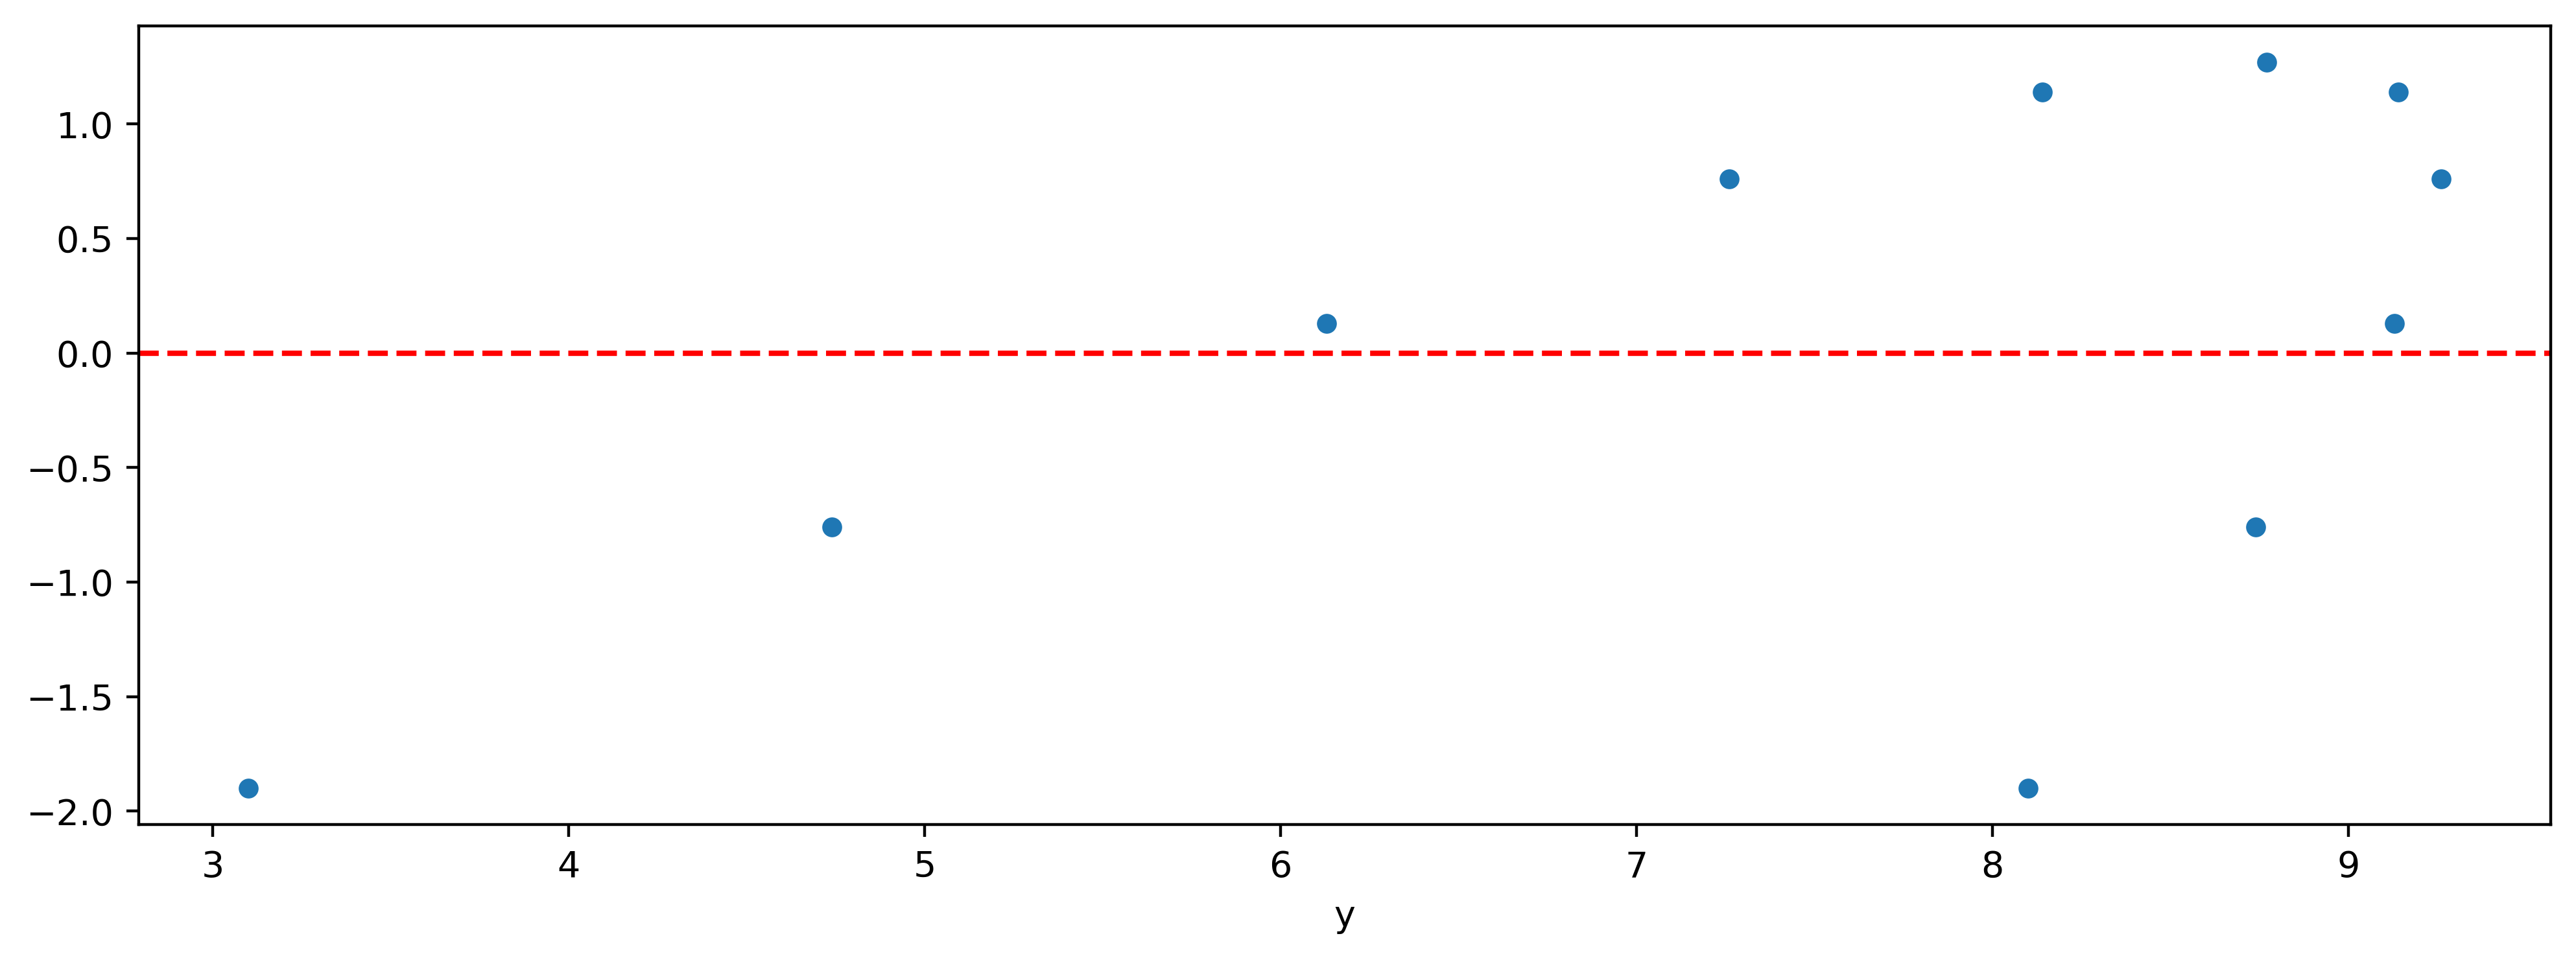

In [23]:
residual = quartet2["y"] - quartet2["y_pred"]
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet2,x="y",y=residual)
plt.axhline(y=0,linestyle="--",color="r")

---------------------------------------------------------------------------------------------------------------------------

In [24]:
quartet3 = pd.read_csv('anscombes_quartet4.csv')

(4.0, 20.0)

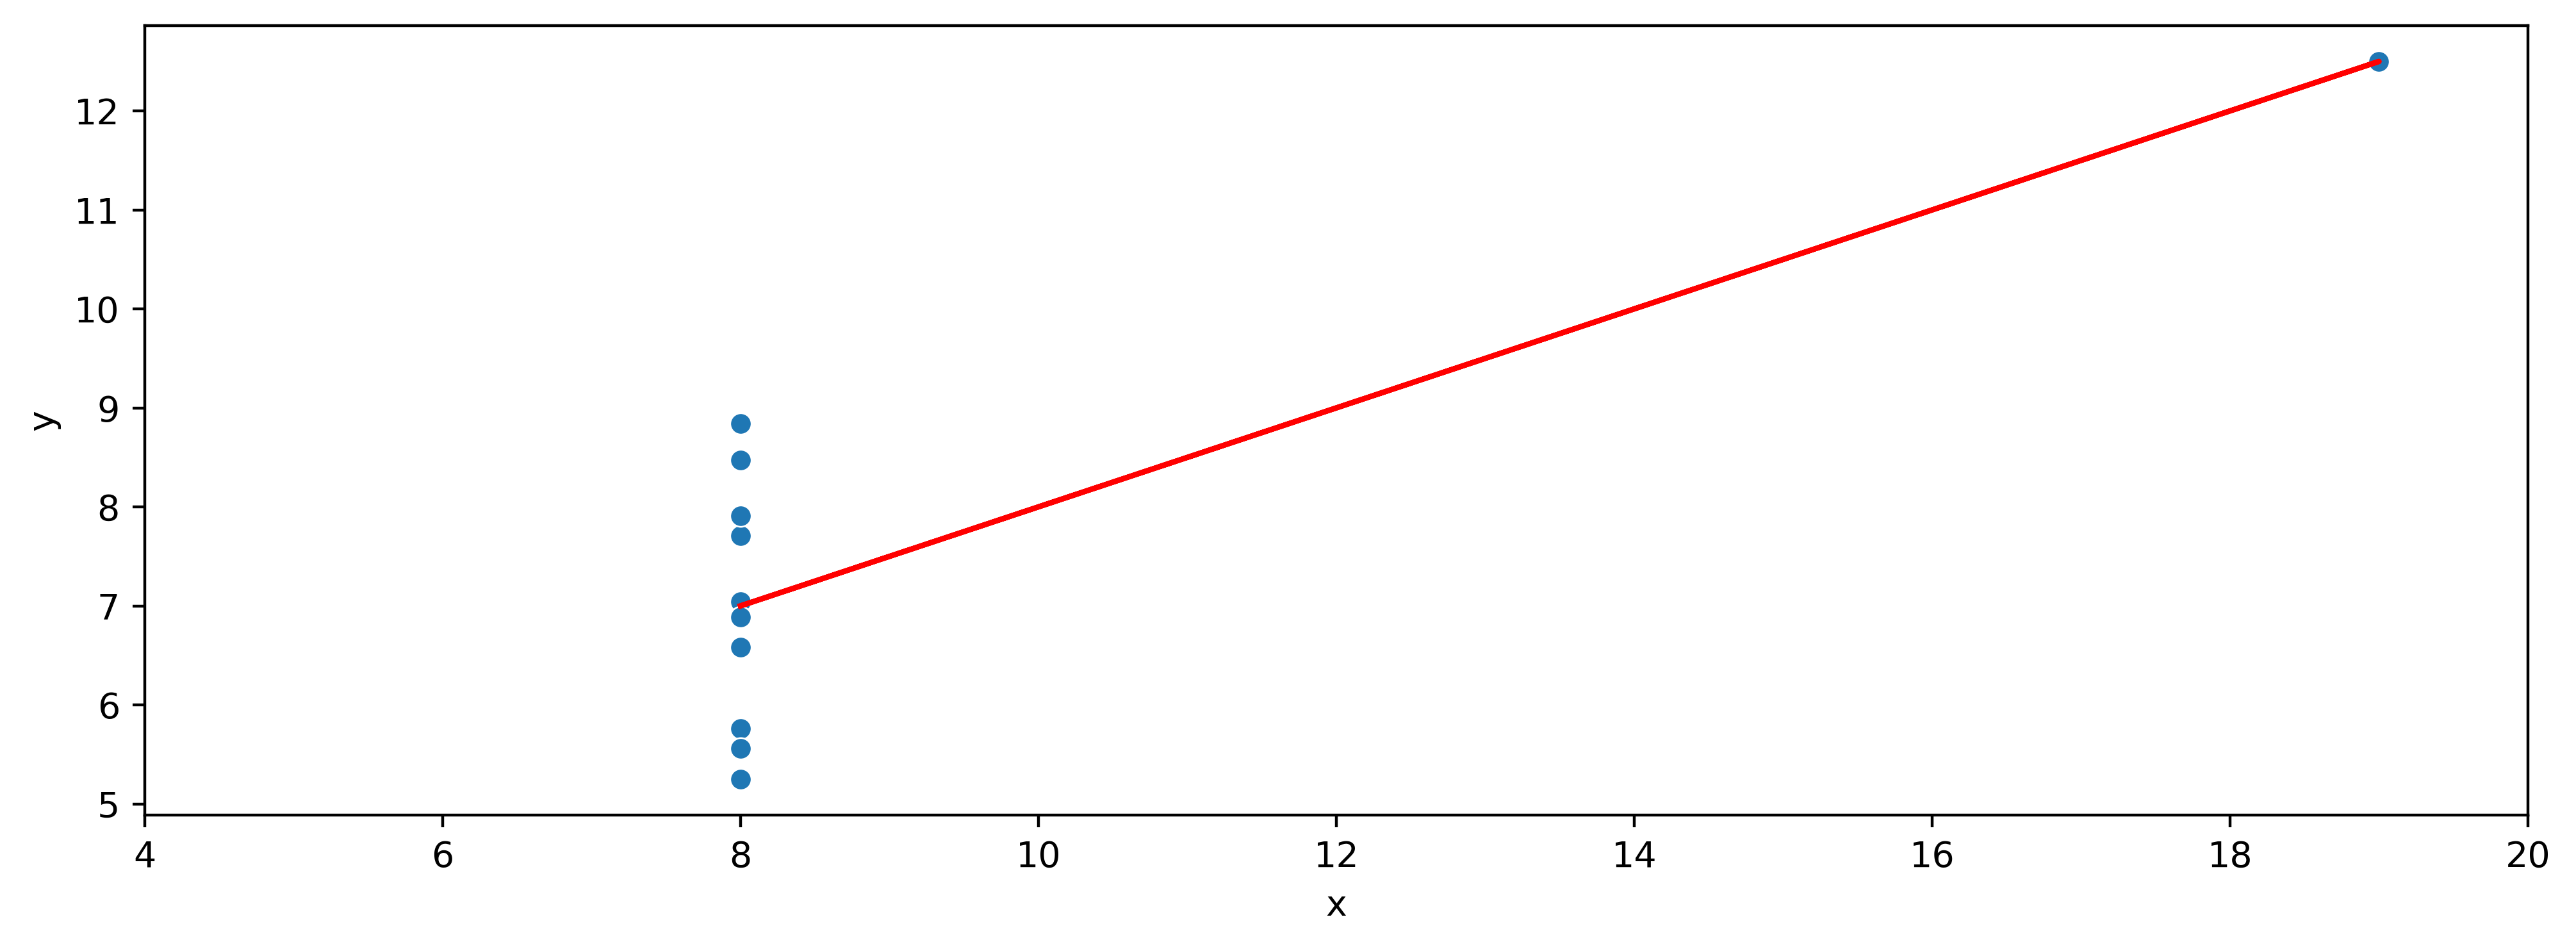

In [25]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet3,x=quartet3["x"],y=quartet3["y"])
np.polyfit(quartet3["x"],quartet3["y"],1)
quartet3["y_pred"] = quartet3["x"]*0.5 + 3
plt.plot(quartet3["x"],quartet3["y_pred"],color="r")
plt.xlim(4,20)

residual hesabı

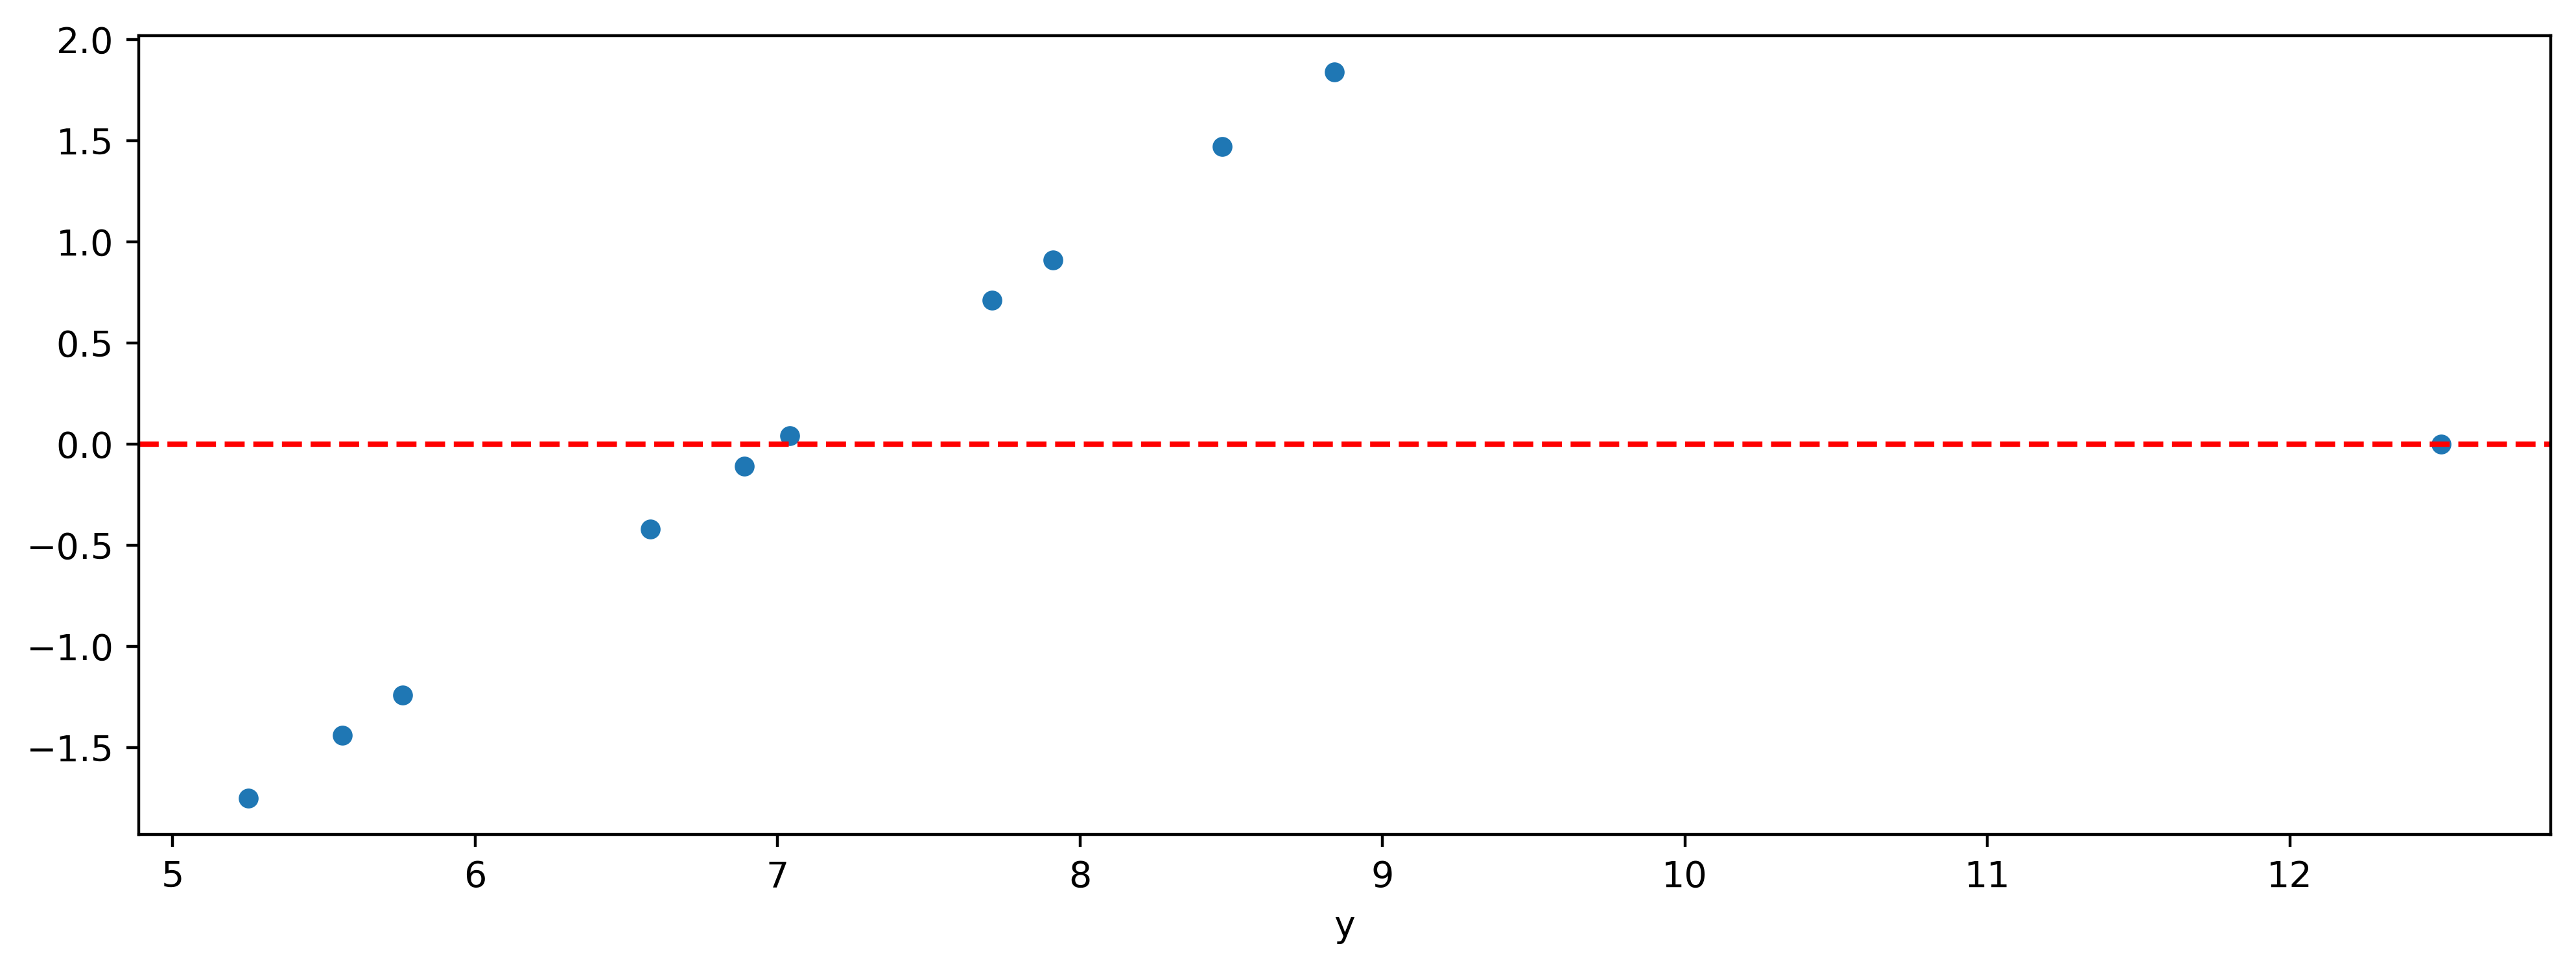

In [26]:
residual = quartet3["y"] - quartet3["y_pred"]
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet3,x="y",y=residual)
plt.axhline(y=0,linestyle="--",color="r")

---------------------------------------------------------------------------------------------------------------------------

In [27]:
quartet4 = pd.read_csv("ascombes_quartet2.csv")

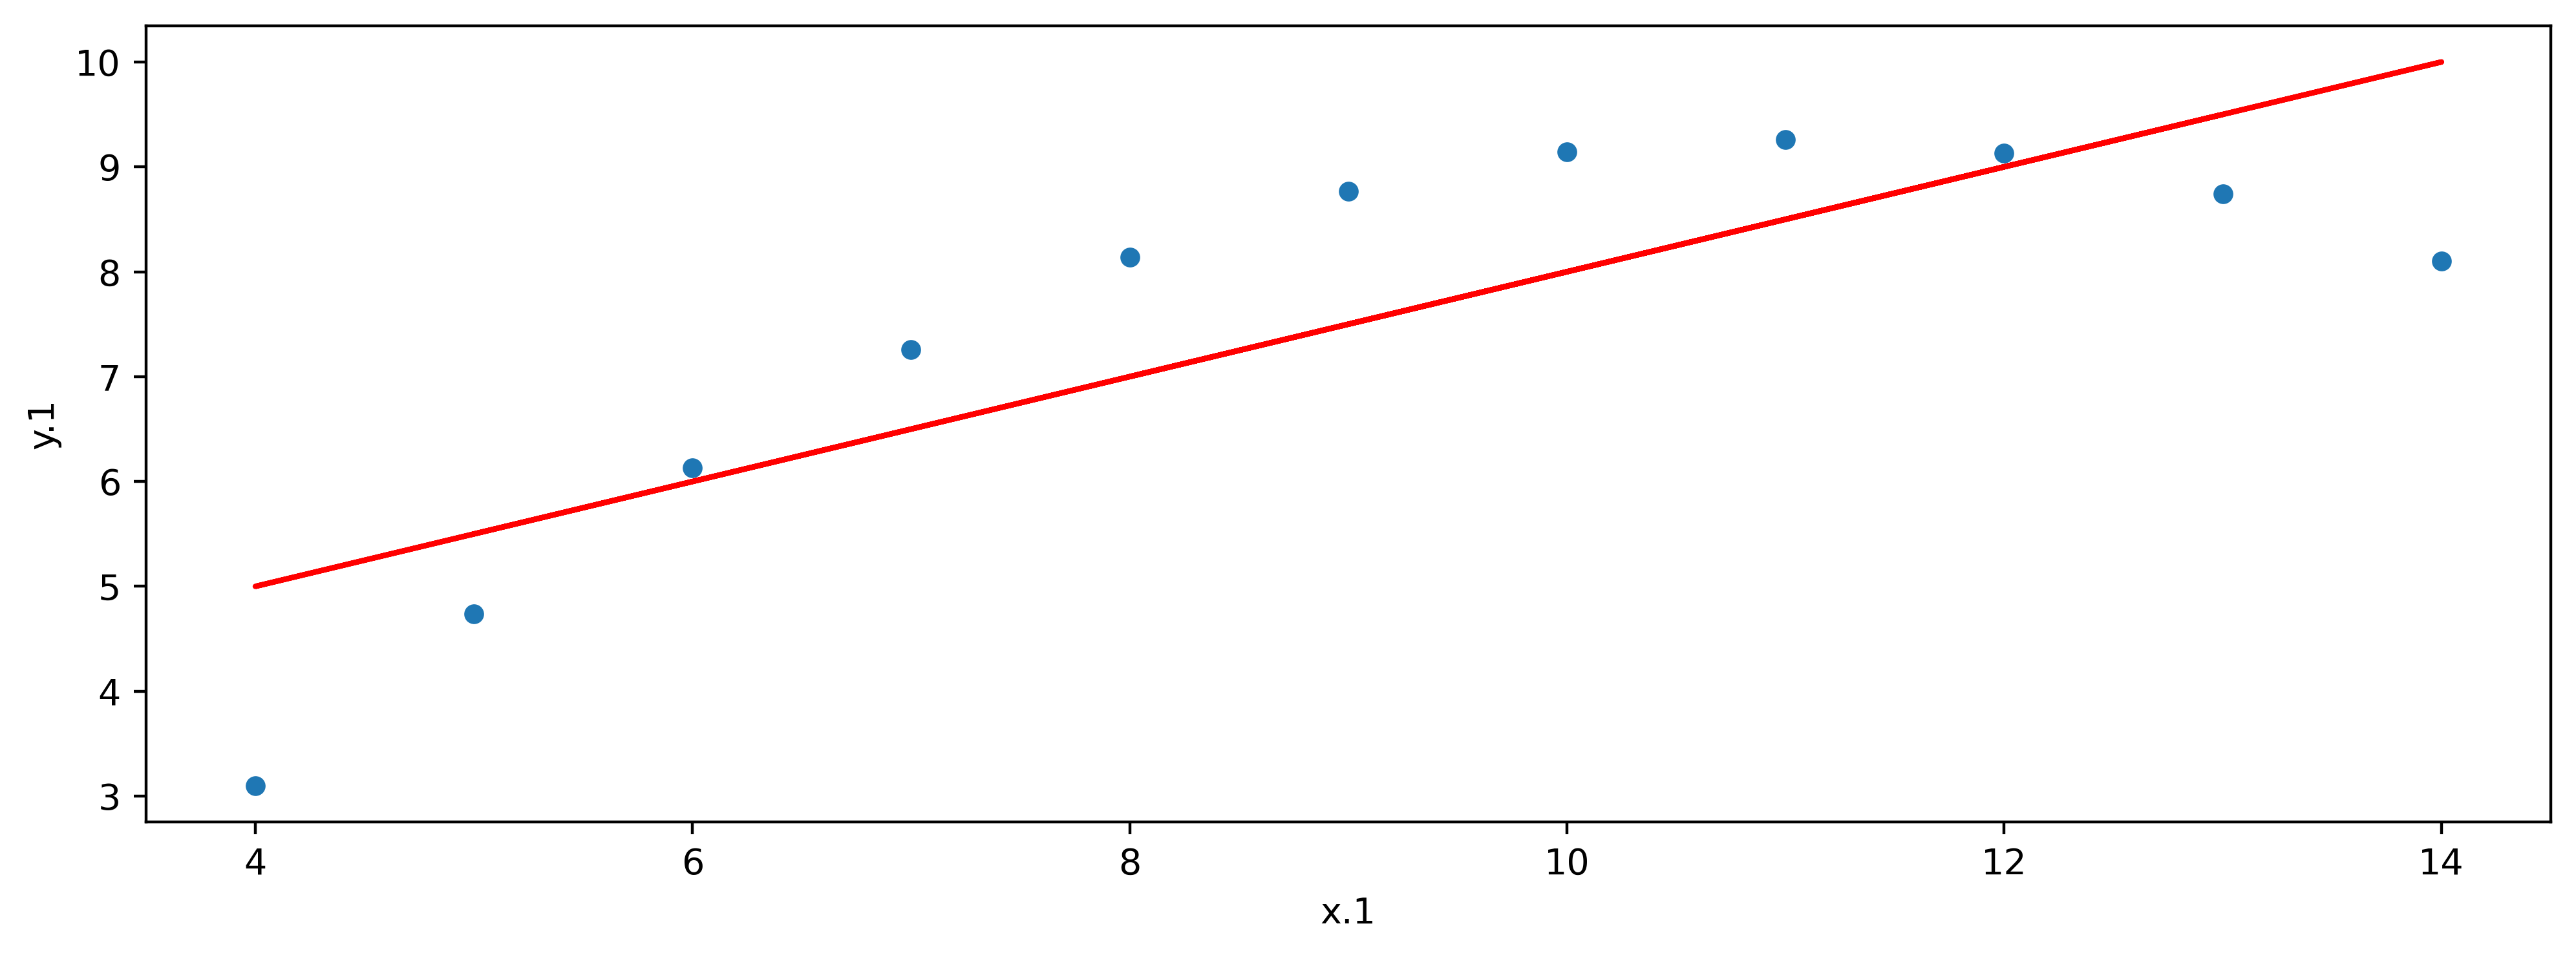

In [28]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=quartet4,x=quartet4["x.1"],y=quartet4["y.1"])
np.polyfit(quartet4["x.1"],quartet4["y.1"],deg=1)
quartet4["y_pred"] = quartet4["x.1"]*0.5 + 3
plt.plot(quartet4["x.1"],quartet4["y_pred"],color="r")

---------------------------------------------------------------------------------------------------------------------------
FİNAL DEĞERLER VE GRAFİKLENMESİ

görüldüğü üzere X_test veri setinin polynomial regression formatında kullanılması gerekmektedir.

In [29]:
X = advertising[["TV","radio","newspaper"]]

In [30]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [31]:
poly_features = polynomial_converter.fit_transform(X)

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y, test_size=0.33, random_state=42)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
test_predictions = model.predict(X_test)

In [37]:
pd.DataFrame(X)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
pd.DataFrame(test_predictions)

,0
0,17.246039
1,22.772952
2,20.322689
3,7.604141
4,24.433348
...,...
61,15.605726
62,12.179508
63,9.035102
64,12.348163


In [39]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [40]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.5475837919149538

In [41]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

0.4603062493888098

In [42]:
RMSE = np.sqrt(MSE)
RMSE

0.6784587307926767

In [43]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


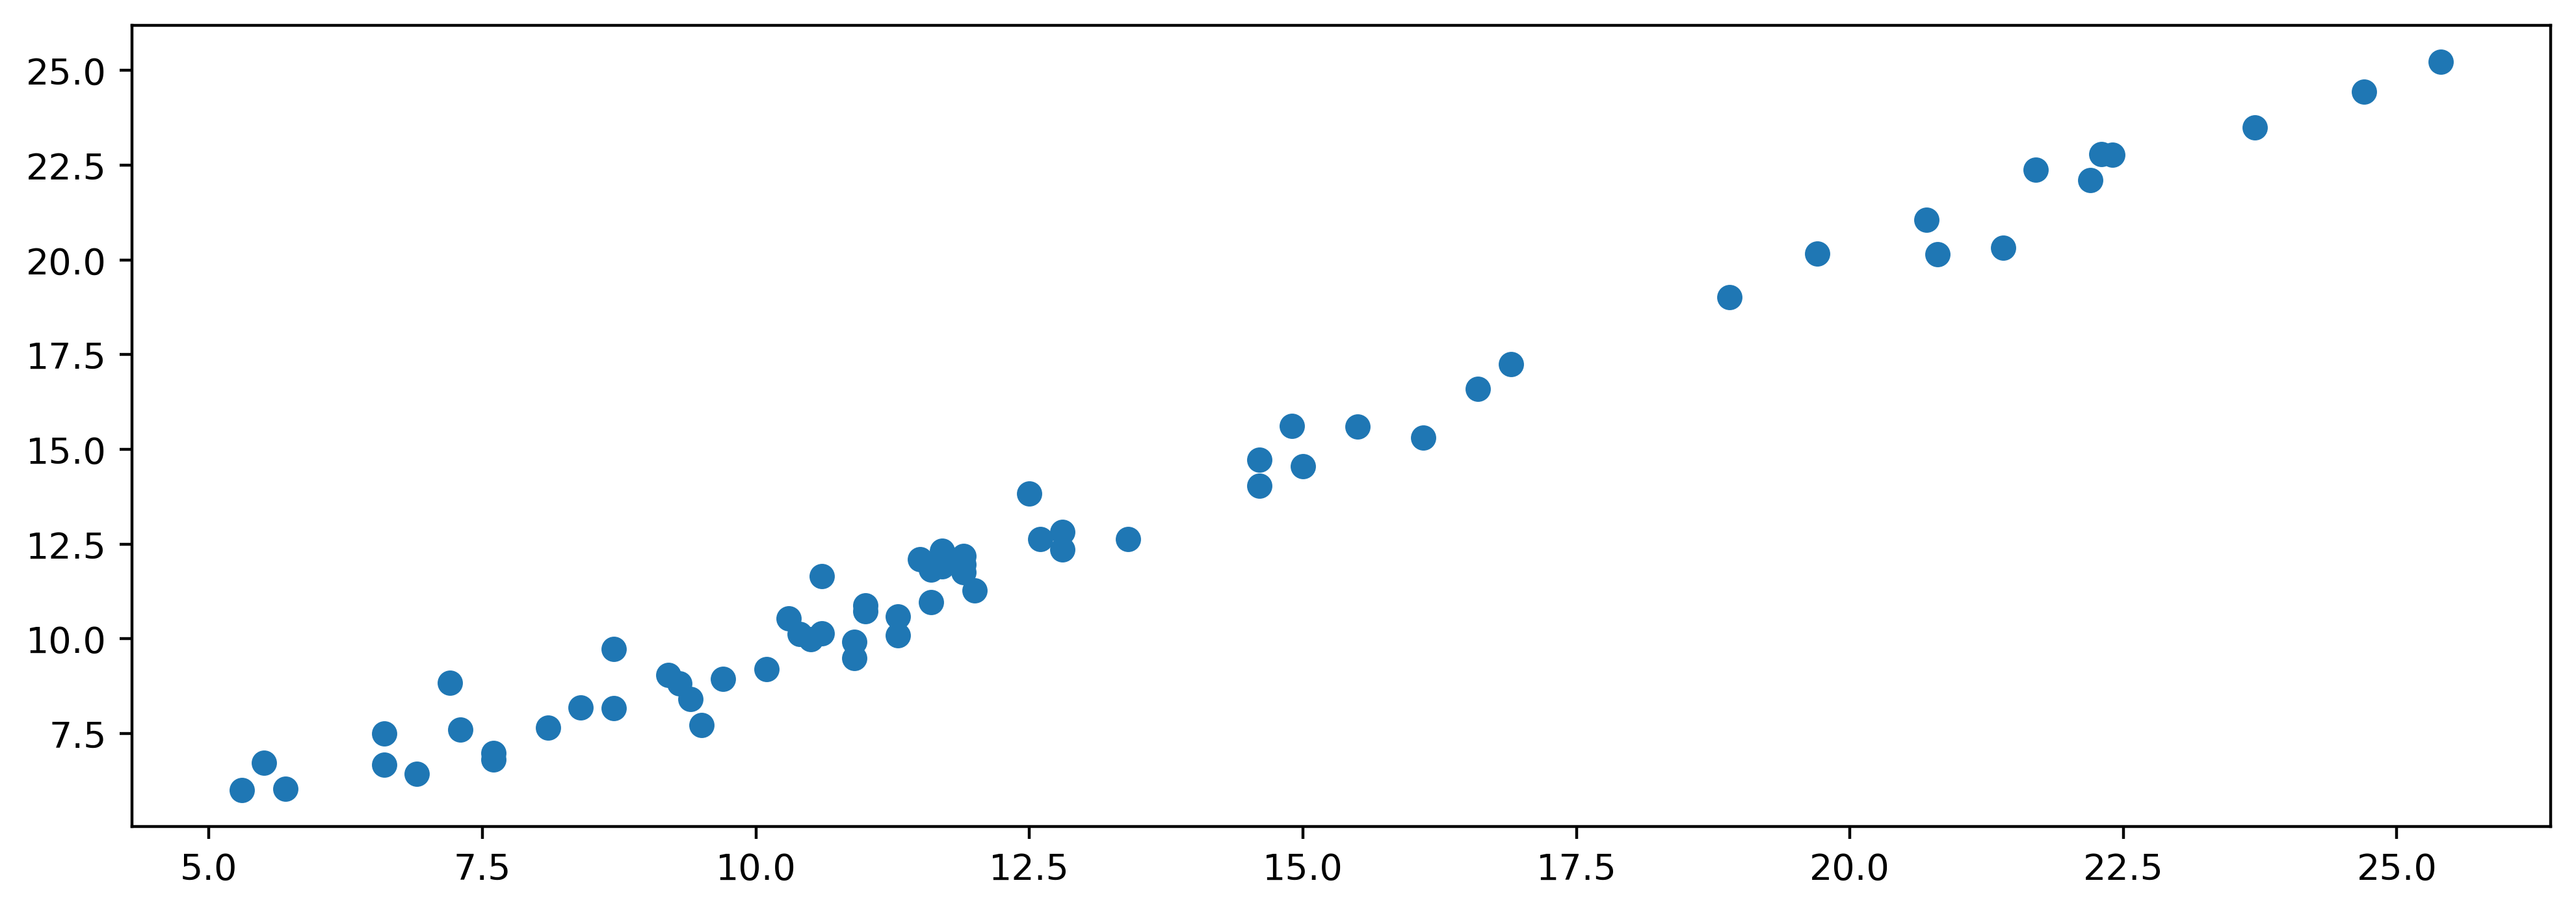

In [44]:
plt.figure(figsize=(12,4))
plt.scatter(x=y_test,y=test_predictions)


POLYNOMİAL REGRESSİON PERFORMANCE VARİABLES
--------------------------------------------------------------------------------
MAE = 0.5475837919149538
MSE = 0.4603062493888098
RMSE = 0.6784587307926767

LİNEAR REGRESSİON PERFORMANCE VARİABLES
------------------------------------------------------------------------------------
MAE = 1.2369188494259318
MSE = 2.348375242713827
RMSE = 1.532440942651242


buradaki performans verilerine bakarak polynomial regressionun hata paylarının daha az olduğunu görebiliriz ancak hata payı test verilerinde ne kadar 0'a yaklaşırsa bilinmeyen veriler karşısında hata oranının bir anda fırlaması durumu çok mümkündür.Bunun önlenmesi için hata miktarının kaçıncı derece fırladığını görmek üzere çeşitli testler yapılmalıdır.

1. dereceden 10. dereceye kadar polynomial regresyon modeli çıkarıp performans değerlerini buluyoruz

In [45]:
train_rmse_err = []
test_rmse_err = []

for deg in range(1,10):
    poly_converter = PolynomialFeatures(degree=deg,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_err.append(train_rmse)
    test_rmse_err.append(test_rmse)

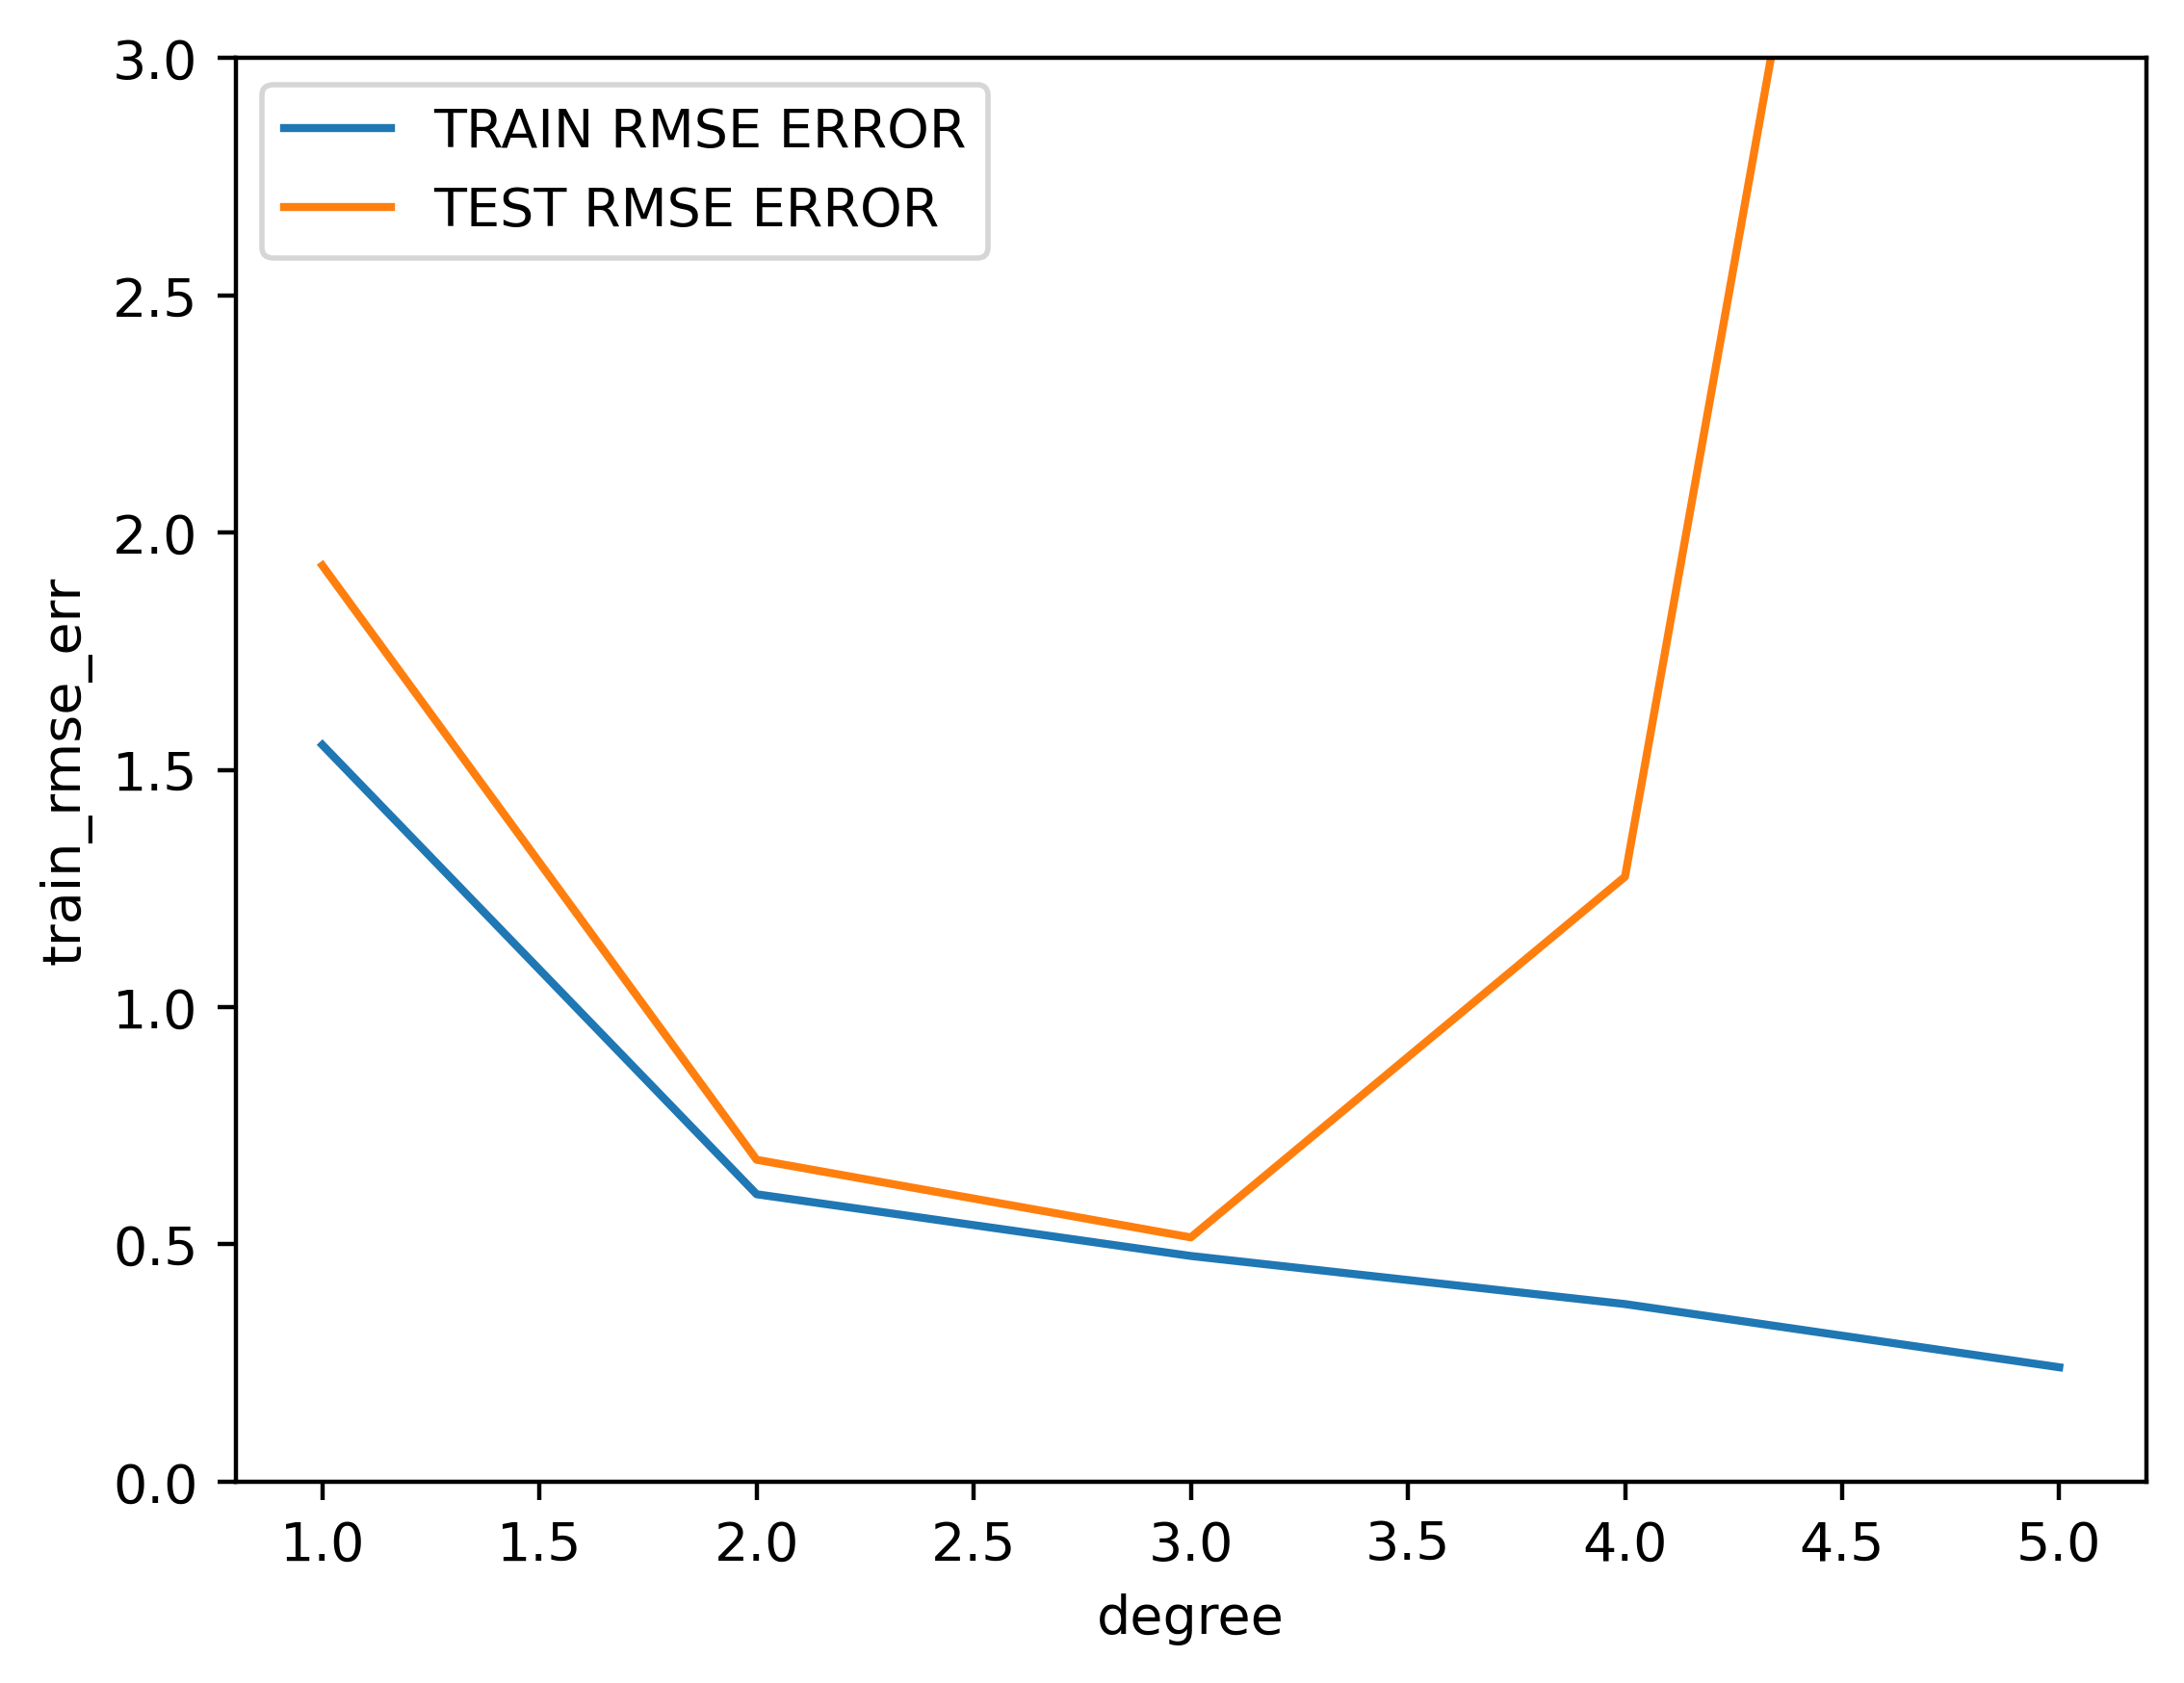

In [46]:
#plt.figure(figsize=(6,2))
plt.plot(range(1,6),train_rmse_err[:5],label="TRAIN RMSE ERROR")
plt.plot(range(1,6),test_rmse_err[:5],label="TEST RMSE ERROR")
plt.xlabel("degree")
plt.ylim(0,3)
plt.ylabel("train_rmse_err")
plt.legend()

3. derece denklem hem hata payı minimum hem de komplekslik seviyesi ortalama olduğu için seçilir. Dikkat etmemiz gereken şey 3. derece sonrasında hata payı düşüyor olsaydı bile komplekslik arttığından olabildiğince az dereceyi seçmemiz gerekirdi.

In [47]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [48]:
final_model = LinearRegression()

In [52]:
fully_converted_x = final_poly_converter.fit_transform(X)

In [68]:
final_model.fit(fully_converted_x,y)

LinearRegression()

In [56]:
from joblib import dump,load

modelimizi kaydettik

In [62]:
dump(final_model,"final_poly_model.joblib")

['final_poly_model.joblib']

polynomial converterimizi kaydettik

In [63]:
dump(final_poly_converter,"final_converter.joblib")

['final_converter.joblib']

In [66]:
loaded_model = load("final_poly_model.joblib")